In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-data-new/ab_data.csv


### Теоретическая часть
**1. Если мы рассчитали 95% доверительный интервал для среднего значения, то какие из следующих утверждений являются верными?**
Ответ: 2, 3

2) Мы можем быть на 95% уверены, что среднее значение в генеральной совокупности принадлежит рассчитанному доверительному интервалу.

3) Если многократно повторять эксперимент, для каждой выборки рассчитывать свой доверительный интервал, то в 95 % случаев истинное среднее будет находиться внутри доверительного интервала.
**2. Если мы увеличиваем объём выборки в два раза (при условии, что показатель стандартного отклонения остается неизменным), то 95% доверительный интервал:**
1) Стал более узким
**3. В центре 95% доверительного интервала, рассчитанного по выборочным значениям, находится:**
2) Выборочное среднее значение
**4. Часто на практике нулевая гипотеза отклоняется, и различия считаются статистически достоверными, если p < 0,05. Однако часто в статистике используется более жёсткий критерий достоверности различий, например, при условии, что p < 0,01. Значение p-уровня значимости, которое выбирается, в качестве порога обозначается буквой α (альфа). Например, если исследователь решил, что α = 0,05, то и нулевая гипотеза будет отклоняться при условии, что p < 0,05.
**

Если в определённой ситуации весьма рискованно отклонить нулевую гипотезу, когда она на самом деле верна, то лучше использовать показатель α равный:
2) 0,001
**5. Данные некоторого исследования сообщают нам, что средний рост детей в 14 лет составляет 166 сантиметров. Однако это лишь выборочная оценка, и исследователи рассчитали 95% доверительный интервал, который составил [160, 172]. Укажите верные утверждения:
1) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 173.
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import statsmodels
import scipy.stats as sts
from sklearn.utils import resample
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(41)
3) У нас достаточно оснований отклонить нулевую гипотезу, что среднее в генеральной совокупности равняется 158.

**6. Предположим, нулевой гипотезой вашего исследования являлось предположение, что конверсия в генеральной совокупности равняется 0.4. Вы получили p = 0,12 и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что конверсия в генеральной совокупности действительно равна 0.4. Как можно оценить результаты?**
1) Вы не совершали ни ошибку первого рода, ни ошибку второго рода.

Так как ошибка первого рода заключается в том, чтобы отклонить верную нулевую гипотезу, то мы здесь её не совершаем, поскольку нулевую гипотезу не отклонили, а она оказалась верной. Ошибка второго рода заключается в том, чтобы принять нулевую гипотезу, когда верна альтернативная. Гипотезу приняли, но альтернативная гипотеза не является верной. Поэтому здесь не совершается ошибка ни первого рода, ни второго.


In [2]:
import pandas as pd
import numpy as np
import random
import statsmodels.api as sm
import statsmodels
import scipy.stats as sts
from sklearn.utils import resample
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(41)

In [3]:
df = pd.read_csv('../input/ab-data-new/ab_data.csv')
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [5]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


In [6]:
n_rows = df.shape[0]
print(f'Число строк: {n_rows}')

Число строк: 294478


In [7]:
user_total = df.nunique()['user_id']
print(f'Число уникальных пользователей: {user_total}')

Число уникальных пользователей: 290584


In [8]:
mismatch_1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print(f'Из тестовой группы неверно направлены {len(mismatch_1)} пользователей')

mismatch_2 = df.query("group == 'control' and landing_page == 'new_page'")
print(f'Из контрольной группы неверно направлены {len(mismatch_2)} пользователей')

Из тестовой группы неверно направлены 1965 пользователей
Из контрольной группы неверно направлены 1928 пользователей


In [9]:
df.groupby(['group','landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [10]:
#объём тестовой группы
n_rows_treat = len(df[df['group'] == 'treatment'])

#объём контрольной группы
n_rows_contr = n_rows - n_rows_treat

print(f'Соотношение размеров тестовой и контрольной групп: {n_rows_treat / n_rows_contr}')
print(f'Вероятность, что новый пользователь будет направлен на версию со старым дизайном: {n_rows_treat / n_rows}')
print(f'Вероятность, что новый пользователь будет направлен на версию с новым дизайном: {n_rows_contr / n_rows}')

Соотношение размеров тестовой и контрольной групп: 1.0005027105609978
Вероятность, что новый пользователь будет направлен на версию со старым дизайном: 0.5001256460584492
Вероятность, что новый пользователь будет направлен на версию с новым дизайном: 0.49987435394155083


In [11]:
df_cleaned = df.loc[(df['group'] == 'control') & (df['landing_page'] == 'old_page') | (df['group'] == 'treatment') & (df['landing_page'] == 'new_page') ]

In [12]:
df_cleaned.groupby(['group','landing_page']).count()

,,user_id,timestamp,converted
group,landing_page,,,
control,old_page,145274,145274,145274
treatment,new_page,145311,145311,145311


In [13]:
# проводим проверку на дублирование
df_cleaned['user_id'].duplicated().sum()

1

In [14]:
# проверяем дубликаты user_id 
df_cleaned[df_cleaned.duplicated(['user_id'],keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

In [15]:
df[df['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df_cleaned = df.drop_duplicates(subset='user_id', keep="first")
df_cleaned['user_id'].duplicated().sum()

0

### Exploratory Data Analysis

<AxesSubplot:xlabel='group,landing_page,converted'>

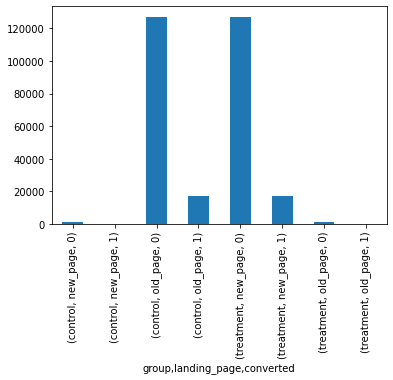

In [17]:
groups = df_cleaned.groupby(['group','landing_page','converted']).size()
groups.plot.bar()

<AxesSubplot:ylabel='landing_page'>

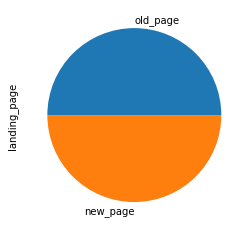

In [18]:
df['landing_page'].value_counts().plot.pie()

### Подготовка данных

In [19]:
# 1) Split groups into two separate DataFrames
a = df[df['group'] == 'control']
b = df[df['group'] == 'treatment']

# 2) A-click, A-noclick, B-click, B-noclick
a_click = a.converted.sum()
a_noclick = a.converted.size - b.converted.sum()
b_click = b.converted.sum()
b_noclick = b.converted.size - b.converted.sum()

# 3) Create np array
T = np.array([[a_click, a_noclick], [b_click, b_noclick]])

### Chi-Squared Test

In [20]:
import scipy
from scipy import stats

print(scipy.stats.chi2_contingency(T,correction=False)[1])

0.2735425174354186


In [21]:
a_CTR = a_click / (a_click + a_noclick)
b_CTR = b_click / (b_click + b_noclick)
print(a_CTR, b_CTR)

0.12022847684365481 0.11891957956489856
